In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Preparing the Dataframe

In [4]:
if 'plots' in os.getcwd():
    print("cwd is correct")
else:
    MYDIR = ("plots")
    os.chdir("../")
    CHECK_FOLDER = os.path.isdir(MYDIR)
    ## If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

os.chdir("plots/")
print("current directroy is: ", os.getcwd())

created folder :  plots
current directroy is:  /Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/analysing_data/plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/all_data.csv")

In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
df_all.shape

(25342111, 40)

In [8]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [9]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()

In [10]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

In [11]:
df_all['Method'].unique()

['Unknown Random', 'Voronoi Frontier Help Closest', 'Unknown Closest', 'Decay Epsilon Greedy Unknown', 'Frontier Closest', 'Decision Frontier Closest', 'Frontier Random', 'Voronoi Frontier Help Random', 'Decay Epsilon Greedy Frontier', 'Gametheory']
Categories (10, object): ['Decay Epsilon Greedy Frontier', 'Decay Epsilon Greedy Unknown', 'Decision Frontier Closest', 'Frontier Closest', ..., 'Unknown Closest', 'Unknown Random', 'Voronoi Frontier Help Closest', 'Voronoi Frontier Help Random']

In [12]:
df_all['Method'] = df_all['Method'].replace(['Gametheory'], 'Anti Majority')

# Set up all the DataFrames

In [13]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [14]:
df_agent = df_all[df_all['Loss Type'] == 'Agent']
df_agent_end = df_agent.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [15]:
df_all_success = df_all[df_all['Success'] == True]
df_end_success = df_end[df_end['Success'] == True]
df_all_success_four = df_all_success[df_all_success['N Bots'] == 4]
df_end_success_four = df_end_success[df_end_success['N Bots'] == 4]

# Worst Case Scenario

In [16]:
# wost_case = df_all_success_four.groupby(['M']).max()[['Frame Count', 'Delta Time']].sort_values(by='Frame Count')
wost_case = df_end_success_four.groupby(['M'])[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].describe().round(2)

# rename Delta Time to Compute Time
wost_case = wost_case.rename(columns={'Delta Time': 'Compute Time'})
wost_case = wost_case.rename(columns={'Frame Count': 'Time (Seconds)'})




# print second level column names
# {'Frame Count',  'mean', 'std', 'min','max'}
wost_case= wost_case.drop(['count', '25%', '50%', '75%'], axis=1, level=1,)

with open(f"worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
    
wost_case

/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_71516/2931398142.py:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


Time (Seconds)                       Replan Count                      \
               mean    std    min     max         mean    std   min    max   
M                                                                            
DEGF         202.55  77.70   63.0   592.0       167.43  50.36  67.0  478.0   
DEGU         160.22  56.14   49.0   543.0       148.42  35.75  58.0  337.0   
DFC          140.62  58.88   47.0  1003.0       194.66  53.03  60.0  523.0   
FC           178.33  89.05   36.0   678.0       195.41  62.49  79.0  591.0   
FR           350.51  99.63  114.0   932.0       145.34  43.56  58.0  395.0   
AM           219.89  72.60   75.0   745.0       152.89  43.83  51.0  392.0   
UC           138.50  55.87   45.0   555.0       211.18  55.03  71.0  562.0   
UR           251.16  79.79   91.0   769.0       103.52  25.59  38.0  203.0   
VFHC         130.77  48.23   44.0   567.0       177.91  36.54  82.0  395.0   
VFHR         177.77  70.28   48.0   685.0        94.55  22.58  38.0  186.0   

     Compute Time                    Update Time                    
             mean   std   min    max        mean   std   min   max  
M                                                                   
DEGF        11.41  3.36  3.74  33.34        0.36  0.22  0.00  1.39  
DEGU        12.01  3.27  4.06  28.85        0.38  0.23  0.00  1.39  
DFC         12.75  3.75  4.90  40.83        0.16  0.10  0.01  0.88  
FC           9.69  3.69  2.16  26.30        0.34  0.22  0.00  1.28  
FR          19.56  5.49  5.20  46.72        0.39  0.23  0.01  1.19  
AM          12.26  3.10  3.70  27.57        0.38  0.23  0.00  1.24  
UC          12.91  4.17  3.76  44.99        0.37  0.23  0.00  1.40  
UR          15.28  3.56  6.31  33.26        0.39  0.23  0.01  1.55  
VFHC        11.92  2.91  4.68  28.57        0.32  0.23  0.00  1.24  
VFHR        10.98  2.73  3.88  24.89        0.36  0.23  0.00  1.13

# Quality Metric Table

In [17]:
# quality_metric = df_agent_end.groupby(['M']).mean()
# quality_metric['Quality'] = quality_metric['Known Area'] / quality_metric['Total Distance Travelled']
# # show quality and method
# quality_metric = quality_metric.reset_index()[['M','Quality','Known Area','Total Distance Travelled']]
# # method_group[['M','Quality']]
# quality_metric = quality_metric.sort_values(by='Quality', ascending=False)
# quality_metric.reset_index()

# with open(f"success_metric.tex", 'w') as f:
#     # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
#     # rotate the table 90 degrees so the index is now the columns
#     f.write(quality_metric.to_latex())
# quality_metric

# Failed Experiment Check

In [18]:
# Total success count
print('Success Count: ', df_end['Success'].value_counts()[True])
# Total fail count
print('Fail Countsss: ', df_end['Success'].value_counts()[False])
# What is the overall success rate
print("Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
total_success = df_end['Success'].value_counts()[True]
total_fail = df_end['Success'].value_counts()[False]
total_experiments = total_success + total_fail
print("Total number of experiments: ", total_experiments, "\n\n")


print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())
print(df_end[df_end['Success'] == True]['Loss Type'].value_counts())
# print(df_end[df_end['Success'] == False]['Method'].value_counts())

Success Count:  173982
Fail Countsss:  28518
Success rate is:  0.8591703703703704
Total number of experiments:  202500 


Unrecoverable    28493
Disrepair           25
Name: Loss Type, dtype: int64
Agent            67500
Disrepair        67475
Unrecoverable    39007
Name: Loss Type, dtype: int64


In [19]:
df_loss_unsuccessful = df_end[df_end['Success'] == False]

# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Disrepair']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()
# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()

df_loss_unsuccessful['N Bots'].value_counts()
# sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())

4     16091
8      7667
12     4760
Name: N Bots, dtype: int64

In [20]:
loss_group = df_loss_unsuccessful.groupby(['M', 'N Bots']).count()['Experiment Id'].unstack()
loss_group

N Bots,4,8,12
M,,,
DEGF,1690,790,494
DEGU,1490,554,291
DFC,1435,448,285
FC,1408,716,522
FR,2156,1442,975
AM,1863,953,566
UC,1198,469,290
UR,2007,1165,706
VFHC,1225,398,199


In [21]:
# df_end['Success Ratio'] 
loss_group2 = df_loss_unsuccessful.groupby(['Loss Type', 'N Bots']).count()['Experiment Id'].unstack()
# loss_group2['Total'] = loss_group2[4]+loss_group2[8] + loss_group2[12]

with open(f"loss_count_vs_agents_size.tex", 'w') as f:
    f.write(loss_group2.to_latex())

loss_group2

/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_71516/1641953233.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(loss_group2.to_latex())


N Bots,4,8,12
Loss Type,,,
Disrepair,25.0,NaN,NaN
Unrecoverable,16066.0,7667.0,4760.0


In [22]:
df_loss_unsuccessful_unrecoverable = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']

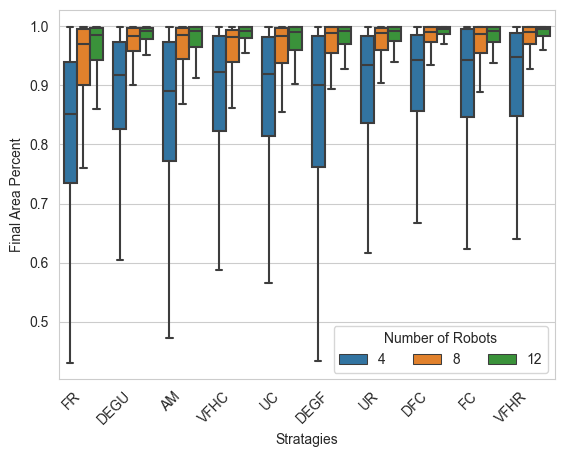

In [23]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
sorted_x_data = df_loss_unsuccessful_unrecoverable.groupby("M")["Area Percent"].median().sort_values().index
grd = sns.boxplot(
    data=df_loss_unsuccessful_unrecoverable, 
    y="Area Percent", x="M", hue="N Bots", 
    showfliers=False,
    order=sorted_x_data,
)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
grd.legend(ncol=3, title='Number of Robots')

grd.set_xticklabels(grd.get_xticklabels(), rotation=45, horizontalalignment='right')
# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Final Area Percent")
grd.set_xlabel("Stratagies")
# grd.set(ylim=(0.9, 1))



plt.savefig(f"unsuccesssful_unrecoverable_analysis.png", bbox_inches='tight' ,dpi=300)

# Plots Start

In [24]:


with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_71516/484898920.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


In [25]:
result = df_end_success.groupby(["M"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

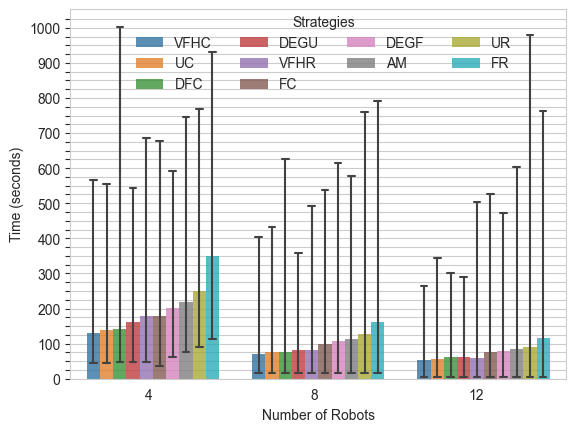

In [26]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    linewidth=0,
    alpha=.8,
    hue_order=result['M']
)
# grd.legend(ncol=5)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper center', borderaxespad=0, title='Strategies')
# place legend in the top of the plot, tight layout to make sure the legend is not cut off
grd.legend(ncol=4, title='Strategies', loc='upper center', bbox_to_anchor=(0.51, 1.0), borderaxespad=0, frameon=False)

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')

plt.yticks(range(0, 1026, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_barplot.png", bbox_inches='tight' ,dpi=300)

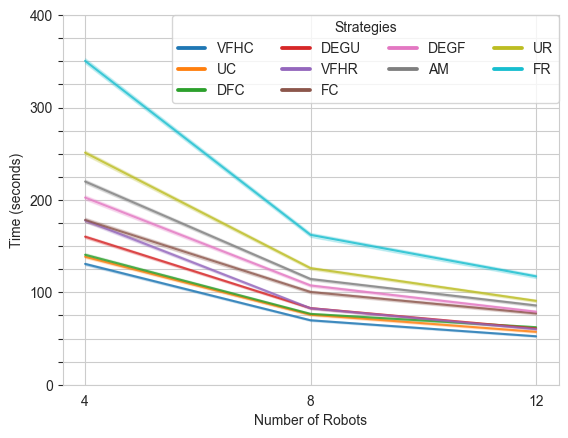

In [27]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.lineplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    alpha=.8,
    hue_order=result['M']
)
# increase line legeond line width

legend = plt.legend(ncol=4, borderaxespad=0, title='Strategies', )
for line in legend.get_lines():
    line.set_linewidth(2.75)  # Set the desired line thickness

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")

plt.xticks(range(4, 16, 4))
plt.yticks(range(0, 401, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_lineplot.png", bbox_inches='tight' ,dpi=300)

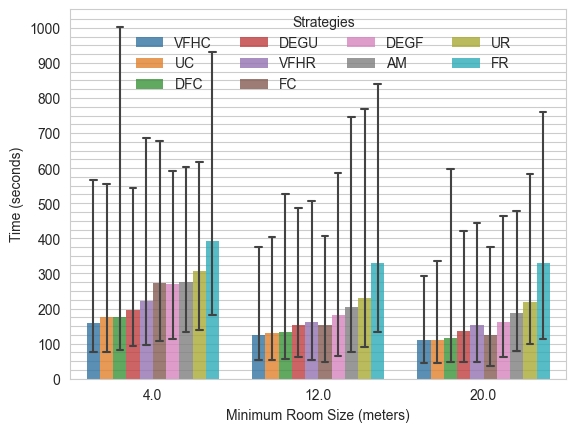

In [58]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")

grd = sns.barplot(
    # data=df_end_success, 
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="Min Room Size", hue="M", 
    # showfliers=False,
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,

    # edgecolor=".5",
    alpha=.8,
    hue_order=result['M']
)
grd.legend(ncol=4, title='Strategies', loc='upper center', bbox_to_anchor=(0.51, 1.0), borderaxespad=0, frameon=False)



# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Minimum Room Size (meters)")
# grd.set(ylim=(0, 550))
# grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 1026, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"room_density_vs_iteration_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

In [29]:
df_all_success

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
0,0,0.1748,0.19,0.19,257,12,0.0,0,437,15.727922,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
1,1,0.1880,0.19,0.38,245,12,0.0,1,470,30.627417,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
2,2,0.1980,0.19,0.57,233,14,0.0,2,495,46.769553,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
3,3,0.2096,0.21,0.79,222,19,0.0,3,524,62.911688,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
4,4,0.2200,0.21,1.01,212,23,0.0,4,550,79.468037,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25342106,149,0.9992,0.07,14.83,287,238,0.0,149,2498,1407.520995,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM
25342107,150,0.9996,0.08,14.91,279,238,0.0,150,2499,1416.763635,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM
25342108,151,0.9996,1.00,15.91,273,248,0.0,151,2499,1426.006276,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM
25342109,152,0.9996,0.08,15.99,265,248,0.0,152,2499,1436.077344,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Anti Majority,start-Center_Start,goal-Rand_Start,85188,Agent,AM


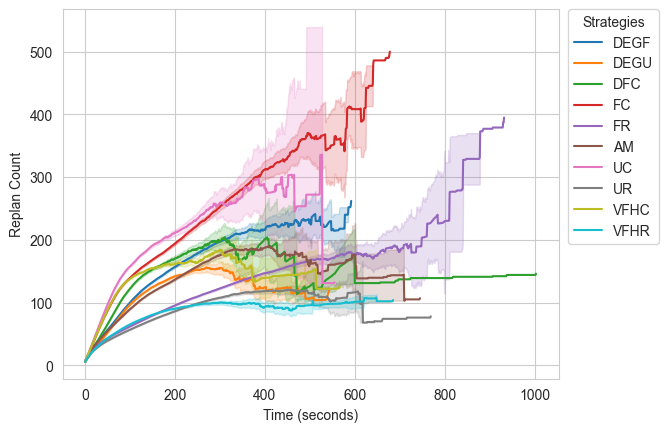

In [30]:
grd = sns.lineplot(data=df_all_success_four, x = 'Frame Count',y = 'Replan Count', hue='M')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# plt.xticks(range(0, 1000, 100))
# plt.ylim(0, 600)
grd.set_ylabel("Replan Count")
grd.set_xlabel("Time (seconds)")
plt.savefig(f"time_vs_replan_count_hue_strategies_before_padding.png", bbox_inches='tight', dpi=300)

KeyboardInterrupt: 

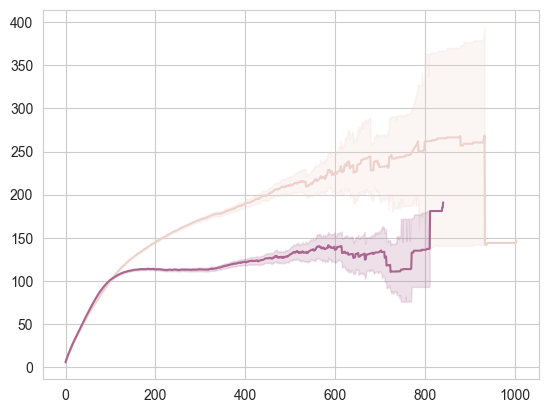

In [31]:
grd = sns.lineplot(data=df_all_success_four, x = 'Frame Count',y = 'Replan Count', hue='Min Room Size')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Room Density')
# plt.xticks(range(0, 1000, 100))
# plt.ylim(0, 400)
grd.set_ylabel("Replan Count")
grd.set_xlabel("Time (seconds)")
plt.savefig(f"time_vs_replan_count_hue_density_before_padding.png", bbox_inches='tight' ,dpi=300)

# PADDING DATA AND PLOTTING 2 FIGURES WITH PAD

In [ ]:
# for i,[method, group] in enumerate(df_all_success.groupby(['M'])):
#     print("i: ", i, "Method: ", method, "Group: ", group.shape)
#     group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
#     unique =  set(group['Frame Count'].unique())
#     data2 = group.groupby("Experiment Id").agg({"Frame Count":lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

#     for j in group_counts.index:
#         data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
#     new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])
    
#     count_group = new_data.groupby(['Frame Count'])
#     x_data = count_group['Replan Count'].mean()
#     sns.lineplot(x_data, label=method)
#     # sns.set_ylabels("Replan Count")
# plt.xlabel("Time (seconds)")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')    
# plt.savefig(f"time_vs_replan_count_hue_strategies_after_padding.png", bbox_inches='tight', dpi=300)

In [112]:
def plot_time_vs_replan_count(ax, data, key_str ='Replan Count', use_legend=False, check_back_idx =10):
    for i, [method, group] in enumerate(data.groupby(['M'])):
        print("i: ", i, "Method: ", method, "Group: ", group.shape)
        group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
        unique = set(group['Frame Count'].unique())
        data2 = group.groupby("Experiment Id").agg({"Frame Count": lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

        for j in group_counts.index:
            data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
        new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])

        count_group = new_data.groupby(['Frame Count'])
        x_data = list(count_group[key_str].mean())
        sns.lineplot(x_data, label=method, ax=ax)

        # place a point at the point where the line converges to its steady state
        cur_color = sns.color_palette()[i]
        for j in range(0, len(x_data)):
            check_index = check_back_idx +j
            if check_index >= len(x_data):
                break
            deta_value = x_data[check_index] - x_data[j]
            if deta_value < 0.1:
                ax.plot(j, x_data[j], 'o', color=cur_color)
                print("Method: ", method, " Steady State: ", x_data[j], "Time: ", j)
                break



    
    if use_legend:
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
    else:
        ax.get_legend().remove()


    ax.set_ylabel(key_str)
    ax.set_xlabel("Time (seconds)")
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')


i:  0 Method:  DEGF Group:  (1029940, 29)
Method:  DEGF  Steady State:  166.84901185770752 Time:  389
i:  1 Method:  DEGU Group:  (848022, 29)
Method:  DEGU  Steady State:  148.0480988593156 Time:  301
i:  2 Method:  DFC Group:  (752722, 29)
Method:  DFC  Steady State:  194.1463781749765 Time:  320
i:  3 Method:  FC Group:  (957989, 29)
Method:  FC  Steady State:  194.60876076375888 Time:  397
i:  4 Method:  FR Group:  (1614835, 29)
Method:  FR  Steady State:  144.72137570744448 Time:  547
i:  5 Method:  AM Group:  (1079487, 29)
Method:  AM  Steady State:  152.49171270718233 Time:  384
i:  6 Method:  UC Group:  (774498, 29)
Method:  UC  Steady State:  210.68263688760806 Time:  284
i:  7 Method:  UR Group:  (1196013, 29)
Method:  UR  Steady State:  103.00253004427577 Time:  412
i:  8 Method:  VFHC Group:  (728021, 29)
Method:  VFHC  Steady State:  177.5628959276018 Time:  262
i:  9 Method:  VFHR Group:  (917269, 29)
Method:  VFHR  Steady State:  94.12746053400896 Time:  320


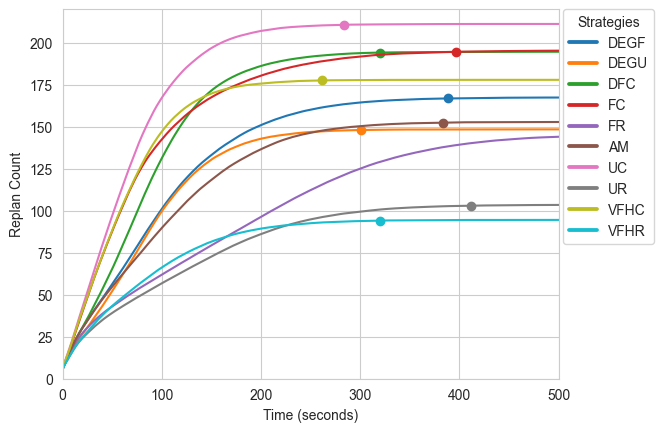

In [108]:
fig, ax = plt.subplots(1, 1, sharex=True)

# Plot the first subplot for Replan Count
plot_time_vs_replan_count(ax, df_all_success_four)
legend =  ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title='Strategies')

for line in legend.get_lines():
    line.set_linewidth(2.75)  # Set the desired line thickness


ax.set_ylabel("Replan Count")

ax.set(ylim=(0, 220))
ax.set(xlim=(0, 500))


plt.savefig("time_vs_replan_count_area_percent_subplots.png", bbox_inches='tight', dpi=300)

i:  0 Method:  DEGF Group:  (1029940, 29)
Method:  DEGF  Steady State:  166.84901185770752 Time:  389
i:  1 Method:  DEGU Group:  (848022, 29)
Method:  DEGU  Steady State:  148.0480988593156 Time:  301
i:  2 Method:  DFC Group:  (752722, 29)
Method:  DFC  Steady State:  194.1463781749765 Time:  320
i:  3 Method:  FC Group:  (957989, 29)
Method:  FC  Steady State:  194.60876076375888 Time:  397
i:  4 Method:  FR Group:  (1614835, 29)
Method:  FR  Steady State:  144.72137570744448 Time:  547
i:  5 Method:  AM Group:  (1079487, 29)
Method:  AM  Steady State:  152.49171270718233 Time:  384
i:  6 Method:  UC Group:  (774498, 29)
Method:  UC  Steady State:  210.68263688760806 Time:  284
i:  7 Method:  UR Group:  (1196013, 29)
Method:  UR  Steady State:  103.00253004427577 Time:  412
i:  8 Method:  VFHC Group:  (728021, 29)
Method:  VFHC  Steady State:  177.5628959276018 Time:  262
i:  9 Method:  VFHR Group:  (917269, 29)
Method:  VFHR  Steady State:  94.12746053400896 Time:  320
i:  0 Method

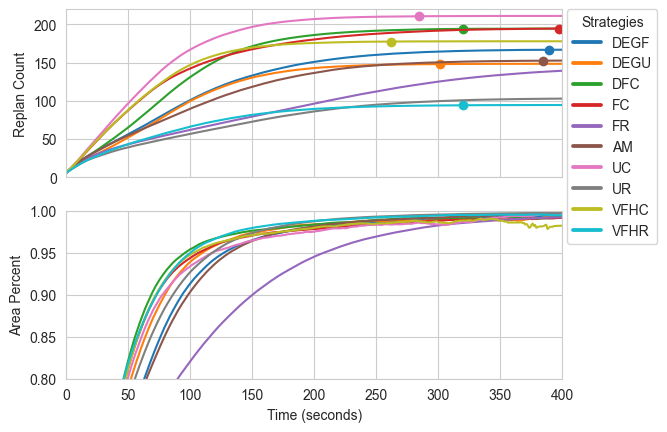

In [109]:
fig, ax = plt.subplots(2, 1, sharex=True)

# Plot the first subplot for Replan Count
plot_time_vs_replan_count(ax[0], df_all_success_four)
legend =  ax[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title='Strategies')

for line in legend.get_lines():
    line.set_linewidth(2.75)  # Set the desired line thickness


ax[0].set_ylabel("Replan Count")

# Plot the second subplot for Area Percent
plot_time_vs_replan_count(ax[1], df_all_success_four, key_str='Area Percent', use_legend=False)
ax[1].set_ylabel("Area Percent")
ax[1].set_xlabel("Time (seconds)")

# remove ax[1] legend
ax[1].get_legend().remove()



# set y range 
# ax[0].set(ylim=(0, 100))
ax[0].set(ylim=(0, 220))
ax[1].set(ylim=(0.80, 1))


ax[0].set(xlim=(0, 400))
ax[1].set(xlim=(0, 400))


plt.savefig("time_vs_replan_count_area_percent_subplots.png", bbox_inches='tight', dpi=300)

i:  0 Method:  DEGF Group:  (1029940, 29)
Method:  DEGF  Steady State:  166.84901185770752 Time:  389
i:  1 Method:  DEGU Group:  (848022, 29)
Method:  DEGU  Steady State:  148.0480988593156 Time:  301
i:  2 Method:  DFC Group:  (752722, 29)
Method:  DFC  Steady State:  194.1463781749765 Time:  320
i:  3 Method:  FC Group:  (957989, 29)
Method:  FC  Steady State:  194.60876076375888 Time:  397
i:  4 Method:  FR Group:  (1614835, 29)
Method:  FR  Steady State:  144.72137570744448 Time:  547
i:  5 Method:  AM Group:  (1079487, 29)
Method:  AM  Steady State:  152.49171270718233 Time:  384
i:  6 Method:  UC Group:  (774498, 29)
Method:  UC  Steady State:  210.68263688760806 Time:  284
i:  7 Method:  UR Group:  (1196013, 29)
Method:  UR  Steady State:  103.00253004427577 Time:  412
i:  8 Method:  VFHC Group:  (728021, 29)
Method:  VFHC  Steady State:  177.5628959276018 Time:  262
i:  9 Method:  VFHR Group:  (917269, 29)
Method:  VFHR  Steady State:  94.12746053400896 Time:  320
i:  0 Method

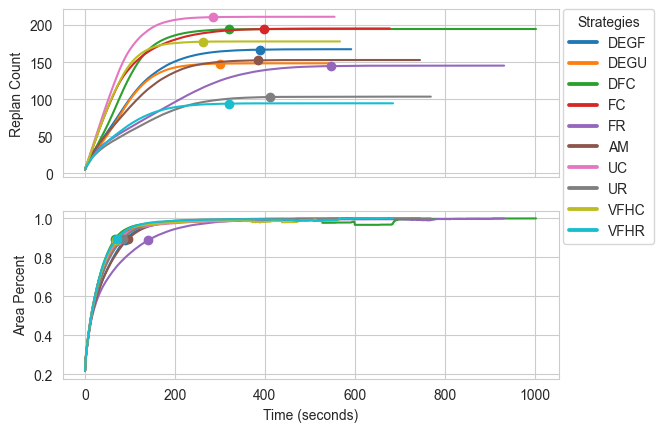

In [113]:
fig, ax = plt.subplots(2, 1, sharex=True)

# Plot the first subplot for Replan Count
plot_time_vs_replan_count(ax[0], df_all_success_four)
legend =  ax[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, title='Strategies')

for line in legend.get_lines():
    line.set_linewidth(2.75)  # Set the desired line thickness


ax[0].set_ylabel("Replan Count")

# Plot the second subplot for Area Percent
plot_time_vs_replan_count(ax[1], df_all_success_four, key_str='Area Percent', use_legend=False, check_back_idx=200)
ax[1].set_ylabel("Area Percent")
ax[1].set_xlabel("Time (seconds)")

# remove ax[1] legend
ax[1].get_legend().remove()



# # set y range 
# # ax[0].set(ylim=(0, 100))
# ax[0].set(ylim=(0, 220))
# ax[1].set(ylim=(0.80, 1))


ax[0].set(xlim=(0, 600))
ax[1].set(xlim=(0, 600))

# set x ticks every 50
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(50))
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(50))


plt.savefig("time_vs_replan_count_area_percent_subplots.png", bbox_inches='tight', dpi=300)

In [76]:
plt.savefig("time_vs_replan_count_area_percent_subplots.png", bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

In [61]:
# for i,[method, group] in enumerate(df_all_success.groupby(['Min Room Size'])):
#     print("i: ", i, "Method: ", method, "Group: ", group.shape)
#     group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
#     unique =  set(group['Frame Count'].unique())
#     data2 = group.groupby("Experiment Id").agg({"Frame Count":lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

#     for j in group_counts.index:
#         data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
#     new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])
    
#     count_group = new_data.groupby(['Frame Count'])
#     x_data = count_group['Replan Count'].mean()
#     sns.lineplot(x_data, label=method)
#     # sns.set_ylabels("Replan Count")
# plt.xlabel("Time (seconds)")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')    
# plt.savefig(f"time_vs_replan_count_hue_density_after_padding.png", bbox_inches='tight', dpi=300)

i:  0 Method:  4.0 Group:  (8439909, 29)


KeyboardInterrupt: 

# PADDING FINISH

In [ ]:
df_end_success['Goal Scenario'].unique()

array(['goal-Rand_Start', 'goal-Edge_Start', 'goal-Top_Left_Start',
       'goal-Center_Start', 'goal-Distributed_Start'], dtype=object)

In [ ]:
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Edge_Start'], 'Edges of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Rand_Start'], 'Random Location')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Top_Left_Start'], 'Top Left Corner')


/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_34183/3802547872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_34183/3802547872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
/var/folders/js/bkw6w289

In [ ]:
df_end_success['Goal Scenario'].unique()

array(['Random Location', 'Edges of Map', 'Top Left Corner',
       'Center of Map', 'Equal Spread'], dtype=object)

In [ ]:
palet2 = sns.color_palette("bright", 10)
paletinv = palet2.reverse()
paletinv


In [ ]:
result22 = df_end_success.groupby(["Goal Scenario"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

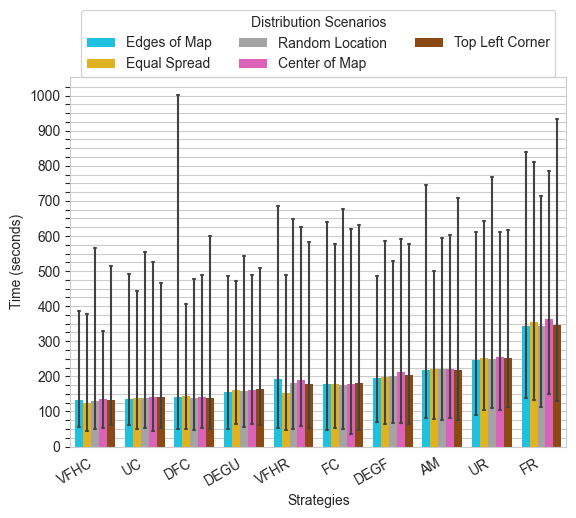

In [ ]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="M", hue="Goal Scenario", 
    palette = palet2,
    
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,
    
    order=result['M'],
    hue_order = result22['Goal Scenario']
    
    
)
grd.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.5, 1.2), title='Distribution Scenarios')
# plt.legend(loc='upper left', title='Distribution Scenarios')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Distribution Scenarios')
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Strategies")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right', rotation=30),

# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

plt.yticks(range(0, 1026, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"distribution_vs_segmentation.png", bbox_inches='tight' ,dpi=300)

In [ ]:
Area_max = df_all['Rows'].iloc[0] * df_all['Cols'].iloc[0]
Area_max

2500

In [ ]:
# calculate Quality df_all for each all the data
# Quality = Area_max/Total Distance Traveled
df_end_success_four['Quality'] = Area_max/df_end_success_four['Total Distance Travelled']
df_end_success_four['Quality'].describe()

/var/folders/js/bkw6w2895kn1mtkmw0kl_b240000gn/T/ipykernel_34183/3128882182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success_four['Quality'] = Area_max/df_end_success_four['Total Distance Travelled']


count    51409.000000
mean         3.850375
std          1.759075
min          0.600539
25%          2.508733
50%          3.554406
75%          4.902341
max         14.878793
Name: Quality, dtype: float64

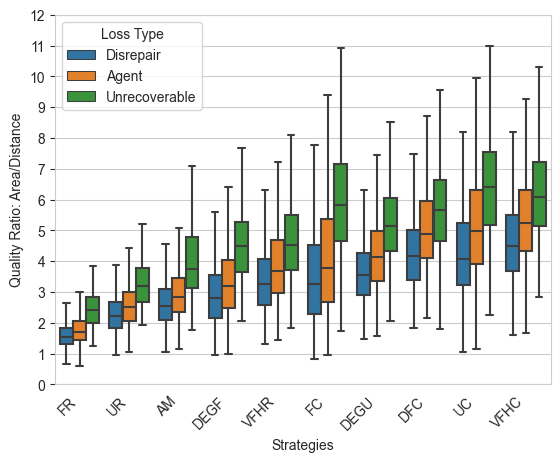

In [ ]:
# Sort the x-axis data based on "Quality"
sorted_x_data = df_end_success_four.groupby("M")["Quality"].median().sort_values().index

grd = sns.boxplot(
    data=df_end_success_four, 
    y="Quality", 
    hue="Loss Type", 
    x="M", 
    order=sorted_x_data,  # Specify the sorted x-axis data
    showfliers=False,
    # alpha=.8,
    hue_order=['Disrepair', 'Agent', 'Unrecoverable']
)

# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Loss Types')
grd.set_xticklabels(grd.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.yticks(range(0, 13, 1))

# rename the x axis 
grd.set(xlabel='Strategies')
grd.set(ylabel='Quality Ratio: Area/Distance')

plt.savefig(f"distance_cost_metric.png", dpi=300, bbox_inches='tight')
plt.show()  # Optionally display the plot